### Text Classification

In [1]:
%matplotlib inline

import pandas as pd

In [2]:
#https://www.kaggle.com/zynicide/wine-reviews/data

wine_df = pd.read_csv('data/wine_reviews.csv')


In [3]:
wine_df['points'].value_counts()

87     16933
86     12600
91     11359
92      9613
85      9530
93      6489
84      6480
94      3758
83      3025
82      1836
95      1535
81       692
96       523
80       397
97       229
98        77
99        33
100       19
Name: points, dtype: int64

In [4]:
wine_df['description'][:5]

0    Aromas include tropical fruit, broom, brimston...
1    This is ripe and fruity, a wine that is smooth...
2    Tart and snappy, the flavors of lime flesh and...
3    Pineapple rind, lemon pith and orange blossom ...
4    Much like the regular bottling from 2012, this...
Name: description, dtype: object

![google_search.png](images/google_search.png)

In [5]:
pd.set_option('display.max_colwidth', 120)



In [6]:
wine_df['description'][:5]

0    Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripen...
1    This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red be...
2    Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity...
3    Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of ...
4    Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal ...
Name: description, dtype: object

In [7]:
wine_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,rating
0,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripen...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Low
1,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red be...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Low
2,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Low
3,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian,Low
4,4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal ...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks,Low


### Turning words in to features

In [8]:
from sklearn.feature_extraction.text import CountVectorizer


# 1. Set up your model, fixing any parameters.

In [9]:
vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (1,2),
                             stop_words  = 'english',
                             min_df      = .01,
                             max_features = None)

# 2. Fit your model

`model.fit(X)`

In [10]:
vectorizer.fit(wine_df['description'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.01,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

# Inpsect your model

In [11]:
len(vectorizer.get_feature_names())

459

# 3. Create new data based on your model

In [12]:
review_word_counts = vectorizer.transform(wine_df['description'])

What words are associated with well-reviewed wines?

In [13]:
wine_df['rating'].value_counts()

Low     51493
High    33635
Name: rating, dtype: int64

# 1. Set up your model, fixing any parameters.

In [14]:
from sklearn.naive_bayes import MultinomialNB

In [15]:
nb_classifier = MultinomialNB()


# 2. Fit your model

`model.fit(X)`

`model.fit(X, Y)`

In [16]:
nb_classifier.fit(review_word_counts, wine_df['rating'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## We have coefficients now

In [17]:
nb_classifier.coef_[0]

array([ -7.39826323,  -7.30949531,  -7.25502175,  -7.26975498,
        -7.45244767,  -8.25120286,  -8.95430037, -11.16157528,
        -7.26420455,  -7.30756667,  -6.7559653 ,  -4.06953068,
        -6.76824909,  -7.30756667,  -7.32310096,  -6.32673742,
        -6.73836308,  -6.98998913,  -6.62507334,  -6.20831233,
        -6.4569712 ,  -6.15701903,  -7.2279687 ,  -4.90704741,
        -7.03005171,  -6.33544574,  -7.10427199,  -3.85358064,
        -6.84773016,  -6.99843989,  -6.82487889,  -5.92464988,
        -7.35088053,  -6.45944339,  -7.36506516,  -7.70439863,
        -6.32818355,  -5.95308316,  -6.79443158,  -7.18444573,
        -9.05966088,  -9.24198244,  -6.84287578,  -4.6896506 ,
        -6.91308004,  -6.50588483,  -7.04032327,  -6.69566716,
        -6.86614688,  -7.34486245,  -6.51893416,  -5.44724259,
        -5.92223616,  -4.72455117,  -6.06004726,  -6.69149614,
        -6.62897579,  -7.50503121,  -7.16922989,  -7.22619093,
        -6.88490916,  -5.36000636,  -6.34643889,  -5.11

In [18]:
coeficients = pd.Series(nb_classifier.coef_[0],
                        index = vectorizer.get_feature_names())

In [19]:
coeficients.sort_values()[:20]

2022             -11.161575
drink 2020        -9.255405
beautifully       -9.241982
beautiful         -9.059661
2020              -8.954300
impressive        -8.797297
opulent           -8.731157
drink 2019        -8.522518
velvety           -8.360974
lovely            -8.328362
cellar            -8.312446
focused           -8.286471
2019              -8.251203
potential         -8.251203
tightly           -8.121391
producer          -7.939070
purple            -7.931849
dark chocolate    -7.931849
layered           -7.931849
drink 2017        -7.906981
dtype: float64

In [20]:
coeficients.sort_values(ascending=False)[:20]

wine      -3.324021
flavors   -3.356434
fruit     -3.778772
aromas    -3.853581
finish    -3.994187
palate    -4.034611
acidity   -4.069531
cherry    -4.339378
drink     -4.372808
tannins   -4.440040
red       -4.468928
ripe      -4.595926
dry       -4.655927
soft      -4.684743
fresh     -4.686002
berry     -4.689651
black     -4.724551
notes     -4.728781
sweet     -4.746627
oak       -4.762224
dtype: float64

<div class="alert alert-info">
<h3> Your turn</h3>
<p> New groups. 
<p> Kickstarter is a web-based platform for people to raise money for their projects. Not all projects meet their financial goals however. Your job is to discern if we can predict which projects will be successful or not based on their text description. </p>
    
<p><b>First step:</b> After loading the data in a new notebook, find the words associated with smallest and largest coefficients for a naive Bayes classifier of campaign success.</p>
</div>


In [21]:
ks_url = 'https://github.com/nealcaren/KULeuvenBigData/blob/master/notebooks/data/kickstarter_100k.csv?raw=true'

# 3. Create new data based on your model

In [22]:
nb_classifier.predict(review_word_counts)

array(['Low', 'Low', 'Low', ..., 'Low', 'High', 'High'], dtype='<U4')

In [23]:
wine_df['prediction']  = nb_classifier.predict(review_word_counts)

In [24]:
pd.crosstab(wine_df['rating'], wine_df['prediction'])

prediction,High,Low
rating,,
High,26842,6793
Low,7954,43539


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [27]:
accuracy_score(wine_df['rating'], wine_df['prediction'])

0.8267667512451837

array([[26842,  6793],
       [ 7954, 43539]])

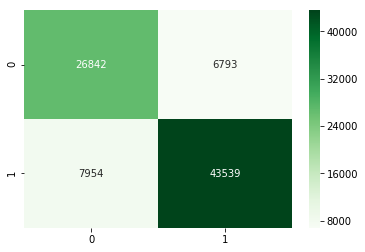

In [75]:
import seaborn as sns

cm = confusion_matrix(wine_df['rating'], wine_df['prediction'])
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')


In [39]:
print(classification_report(wine_df['rating'], wine_df['prediction']))

              precision    recall  f1-score   support

        High       0.77      0.80      0.78     33635
         Low       0.87      0.85      0.86     51493

   micro avg       0.83      0.83      0.83     85128
   macro avg       0.82      0.82      0.82     85128
weighted avg       0.83      0.83      0.83     85128



Precision: % of selected items that are correct 

Recall: % of correct items that are selected



<div class="alert alert-info">
<h3> Your turn</h3>
<p> How's your Kickstarter model doing? How many correct? Is it balanced?</div>



In [40]:
nb_classifier.predict_proba(review_word_counts)

array([[0.02441804, 0.97558196],
       [0.32799953, 0.67200047],
       [0.00346265, 0.99653735],
       ...,
       [0.09784092, 0.90215908],
       [0.91947045, 0.08052955],
       [0.64839775, 0.35160225]])

In [41]:
predict_df = pd.DataFrame(nb_classifier.predict_proba(review_word_counts), 
                          columns=nb_classifier.classes_)

In [42]:
predict_df.head()

,High,Low
0,0.024418,0.975582
1,0.328000,0.672000
2,0.003463,0.996537
3,0.009818,0.990182
4,0.017622,0.982378


In [43]:
wine_df_prediction = pd.concat([wine_df, predict_df], axis = 1)

In [44]:
wine_df_prediction.sort_values('High', ascending=False)[['description','points']].head(15)

,description,points
79481,"From a beautifully exposed southwest facing vineyard with views of the Pyrenees, this is a serious and impressive wi...",96
5129,"A blend of 28% Cabernet Franc, 23% Cabernet Sauvignon, 21% Malbec, 18% Petit Verdot and 10% Merlot, this is a big, b...",94
25463,"A blend of 28% Cabernet Franc, 23% Cabernet Sauvignon, 21% Malbec, 18% Petit Verdot and 10% Merlot, this is a big, b...",94
18317,"Initially closed, this elegant vibrant red slowly reveals alluring aromas of mature black-skinned fruit, French oak,...",94
36344,"Mature dark-skinned berry, leather, underbrush and dark spice are some of the aromas that emerge on this fantastic r...",97
72251,"Perfumed berry, rose, fragrant blue flower, tilled earth, baking spice and a hint of new leather are just some of th...",96
10192,"This is a rich, concentrated wine, powered by both tannins and very ripe fruit. It is produced from vines planted in...",94
67748,"Dark, rich mountain blueberry and blackberry form the core of this classically delicious Napa Valley wine from an es...",93
75255,"This is the second wine of Mouchão estate, a power in its own right. It is beautifully perfumed with violets and spi...",93
77340,"From one of the top estates in Cahors, this complex, dense wine is both structured and packed with great fruit. At t...",94


In [45]:
wine_df_prediction.sort_values('Low', ascending=False)[['description','points']].head(15)

,description,points
39450,"Reasonably accurate on the nose for Leyda Sauvignon Blanc, but also a little pickled smelling. Feels chunky and a li...",85
16200,"Lively aromas of grapefruit, white flowers and mineral lead into a light, fruity but rather simple palate that offer...",86
66311,"Dry, mild, dusty berry aromas are simple but correct for the variety. This feels scattered across the palate, with s...",86
26592,"Lemon citrus, toast, white flowers—the lead on this wine is feminine and light and, as the name suggests, feels like...",84
38207,"A light straw color, bright fruit aromas and a dot of sweetness paint the picture of an easy-drinking refresher. The...",86
63660,"Apple and mineral aromas are basic but clean, and the palate is fresh and lithe, with little to no extra weight. Fla...",86
43618,A medium-bodied Bordeaux blend with sweet aromas of cherry pie and a hint of fresh sage and tarragon. Simple and str...,85
58337,Here's a fresh and easy Sauvignon Blanc that would pair with easy appetizers or a salad lunch. Crisp but simple arom...,86
13944,This straightforward Verdicchio opens with subdued aromas of stone fruit and citrus. The palate is a bit lean but of...,86
76673,"Earthy, leafy red-fruit aromas are a bit rustic and burnt-smelling. This solid, chunky Pinot has spicy oak leading s...",86


<div class="alert alert-info">
<h3> Your turn</h3>
  <p> Which <b>failed</b> Kickstarter campaign had the highest likelihood of being funded?

</div>



### What about overfitting?

In [46]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(wine_df, test_size=0.2)

In [47]:
len(train)

68102

In [48]:
len(test)

17026

In [49]:
vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (1,2),
                             stop_words  = 'english',
                             min_df      = .01,
                             max_features = None)

vectorizer.fit(train['description'])


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.01,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [50]:
X_train = vectorizer.transform(train['description'])

In [51]:
nb_classifier.fit(X_train, train['rating'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [52]:
print(accuracy_score(train['rating'],
                     nb_classifier.predict(X_train)))



0.8279786203048368


In [55]:
test_wf         = vectorizer.transform(test['description'])
test_prediction = nb_classifier.predict(test_wf)

In [56]:
print(accuracy_score(test['rating'], test_prediction))

0.8256783742511453


In [61]:
vectorizer = CountVectorizer(lowercase=True,
                             ngram_range = (1,3),
                             stop_words = 'english',
                             max_df = .60,
                             min_df = 5,
                             max_features = None)

In [62]:
vectorizer.fit(train['description'])
print(len(vectorizer.get_feature_names()))
X_train = vectorizer.transform(train['description'])
nb_classifier.fit(X_train, train['rating'])


76831


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [63]:
print(accuracy_score(train['rating'],
                     nb_classifier.predict(X_train)))



0.9176382485095885


In [64]:

print(accuracy_score(test['rating'],
                     nb_classifier.predict(vectorizer.transform(test['description']))))


0.8882297662398685


<div class="alert alert-info">
<h3> Your turn</h3>
<p> What happens to your model if you change some of the parameters for your vectorizer? Be sure to spit the data between train and test!

</div>




# What about a different model?

In [65]:
from sklearn.linear_model import LogisticRegression

In [67]:
ln_classifier = LogisticRegression()

In [68]:
vectorizer = CountVectorizer(lowercase=True,
                             ngram_range = (1,2),
                             stop_words = 'english',
                             min_df = .01,
                             max_features = None)

vectorizer.fit(train['description'])

print(len(vectorizer.get_feature_names()))
ln_classifier.fit(vectorizer.transform(train['description']), train['rating'])

456


/Users/nealcaren/anaconda3/envs/kuleuven/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
print(accuracy_score(train['rating'],
                     ln_classifier.predict(vectorizer.transform(train['description']))))

0.8826613021644004


In [70]:
print(accuracy_score(test['rating'],
                     ln_classifier.predict(vectorizer.transform(test['description']))))

0.8797133795371784


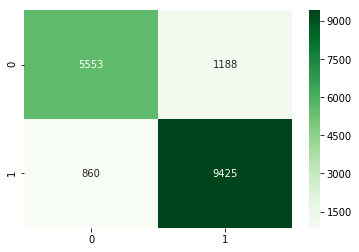

In [73]:
test_prediction = ln_classifier.predict(vectorizer.transform(test['description']))

cm = confusion_matrix(test['rating'], test_prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')



<div class="alert alert-info">
<h3> Your turn</h3>
What is the out sample accuracy of a logistic regression model on your data?
<p><code> from sklearn.linear_model import LogisticRegression

</div>





# What about a different model?

![](images/knn1.png)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 3)

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
tf_vector  = TfidfVectorizer(lowercase  =  True,
                             ngram_range = (1,2),
                             stop_words  = 'english',
                             max_df      = .60,
                             min_df      = .05,
                             max_features = None)

In [89]:
train, test = train_test_split(wine_df, test_size=0.7)

In [90]:
tf_vector.fit(train['description'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.6, max_features=None, min_df=0.05,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [91]:
review_tf = tf_vector.transform(train['description'])

In [92]:
knn_classifier.fit(review_tf, train['rating'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [93]:
knn_prediction = knn_classifier.predict(review_tf)

In [94]:

print(accuracy_score(train['rating'], knn_prediction))



0.8431748766543974


In [95]:
print(classification_report(train['rating'], knn_prediction))

              precision    recall  f1-score   support

        High       0.84      0.74      0.79      9987
         Low       0.85      0.91      0.88     15551

   micro avg       0.84      0.84      0.84     25538
   macro avg       0.84      0.83      0.83     25538
weighted avg       0.84      0.84      0.84     25538



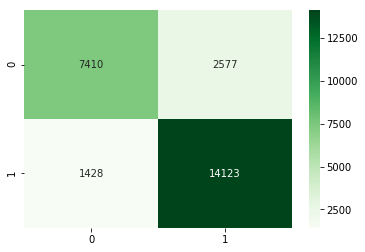

In [96]:
cm = confusion_matrix(train['rating'], knn_prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')


<div class="alert alert-info">
<h3> Your turn</h3>
<p> What does a k-nearest neigbhor for your speech dataset look like? (Don't forget to shrink your dataframe). How does the accuracy compare?
</div>





![](images/knn2.png)

In [97]:
knn_classifier = KNeighborsClassifier(n_neighbors = 15)

# But what's the best fitting model?

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
# old model: knn_classifier = KNeighborsClassifier(n_neighbors = 3)

parameters = {'n_neighbors' : [2,3, 7],
              'weights'      : ['distance', 'uniform']}
              

In [88]:
grid = GridSearchCV(KNeighborsClassifier(), 
                    parameters, 
                    cv = 5)

![](images/cv.png)


# But what's the best fitting model?

In [ ]:
grid.fit(review_tf,
         train['rating'])

In [ ]:
grid.cv_results_

In [ ]:
pd.DataFrame(grid.cv_results_)

In [ ]:
grid.best_estimator_

In [ ]:
train_prediction = grid.best_estimator_.predict(review_tf)

print(accuracy_score(train['rating'], train_prediction))

# But what's the best fitting model?

In [83]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
                     ('vectorizer' , CountVectorizer()),
                     ('classifier' , KNeighborsClassifier())
                    ])

parameters = {'vectorizer__max_features' : [300, 500, 700],
              'classifier__n_neighbors' : [2,3, 5] }




In [ ]:
grid_search = GridSearchCV(pipeline,
                           parameters,
                           n_jobs = -1,
                           cv = 3,
                           verbose = 1)

In [ ]:
grid_search.fit(wine_df['description'],
                wine_df['rating'])

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_estimator_.get_params

<div class="alert alert-info">
<h3> Homework</h3>
<p> The "data" folder contains board games descriptions scraped from BoardGameGeeks.com. Analyze the relationship between the words in the <code>description</code> and whether or not reviewers thought it was a <code>quality_game</code>. 
</div>






In [ ]:
bg_url = 'https://raw.githubusercontent.com/nealcaren/KULeuvenBigData/master/notebooks/data/boardgames.csv'